# 다중분류
---

In [38]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/penguins.csv

In [39]:
# 결측치 제거, 성별 인코딩, 섬 인코딩하고, 종별 y축으로 만들기

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as ply
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [41]:
df = pd.read_csv('/content/penguins.csv')
df.shape

(344, 7)

In [42]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [43]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [44]:
df.loc[df['bill_length_mm'].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [45]:
df = df.dropna(subset = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex'])

In [46]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [47]:
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [48]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['island'] = encoder.fit_transform(df['island'])
df['sex'] = encoder.fit_transform(df['sex'])
df['species'] = encoder.fit_transform(df['species'])
df.head()

<ipython-input-48-865d709f895a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['island'] = encoder.fit_transform(df['island'])
<ipython-input-48-865d709f895a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = encoder.fit_transform(df['sex'])
<ipython-input-48-865d709f895a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1


In [49]:
x = df.drop(['species'], axis=1)
y = df['species']

In [50]:
df['species'].value_counts()

0    146
2    119
1     68
Name: species, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 2022)

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
y_train = y_train.values

In [53]:
y_train

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2,
       2, 2, 0, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0,
       2, 2, 0, 1, 2, 2, 1, 0, 1, 2, 0, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2,
       2, 0, 1, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 0, 1, 2, 0, 2, 2,
       0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0, 1,
       0, 2, 0, 2, 2, 0, 1, 0, 1, 0, 2, 0, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0,
       1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0])

In [54]:
from tensorflow.keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_train_o

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0

In [55]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(6,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(3, activation='softmax') # softmax 사용이유, 2진분류 다중분류는 binary, categorical 사용하는것
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                448       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 16)                528       
                                                                 
 dense_12 (Dense)            (None, 8)                 136       
                                                                 
 dense_13 (Dense)            (None, 3)                 27        
                                                                 
Total params: 3,219
Trainable params: 3,219
Non-trainable params: 0
_________________________________________________________________


In [57]:
EPOCHS = 500
BATCH_SIZE = 32

history = model.fit(x_train, y_train_o,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_split = 0.2,
                    verbose = 1)

Epoch 1/500
7/7 [==============================] - 1s 31ms/step - loss: 1.0693 - acc: 0.3868 - val_loss: 1.0127 - val_acc: 0.5370
Epoch 2/500
7/7 [==============================] - 0s 6ms/step - loss: 0.9621 - acc: 0.6509 - val_loss: 0.9159 - val_acc: 0.7037
Epoch 3/500
7/7 [==============================] - 0s 7ms/step - loss: 0.8469 - acc: 0.7547 - val_loss: 0.8042 - val_acc: 0.7963
Epoch 4/500
7/7 [==============================] - 0s 6ms/step - loss: 0.7263 - acc: 0.7925 - val_loss: 0.6886 - val_acc: 0.7963
Epoch 5/500
7/7 [==============================] - 0s 6ms/step - loss: 0.6121 - acc: 0.7972 - val_loss: 0.5761 - val_acc: 0.7963
Epoch 6/500
7/7 [==============================] - 0s 7ms/step - loss: 0.5124 - acc: 0.7972 - val_loss: 0.4823 - val_acc: 0.7963
Epoch 7/500
7/7 [==============================] - 0s 6ms/step - loss: 0.4355 - acc: 0.7972 - val_loss: 0.4197 - val_acc: 0.7963
Epoch 8/500
7/7 [==============================] - 0s 7ms/step - loss: 0.3855 - acc: 0.7972 - va

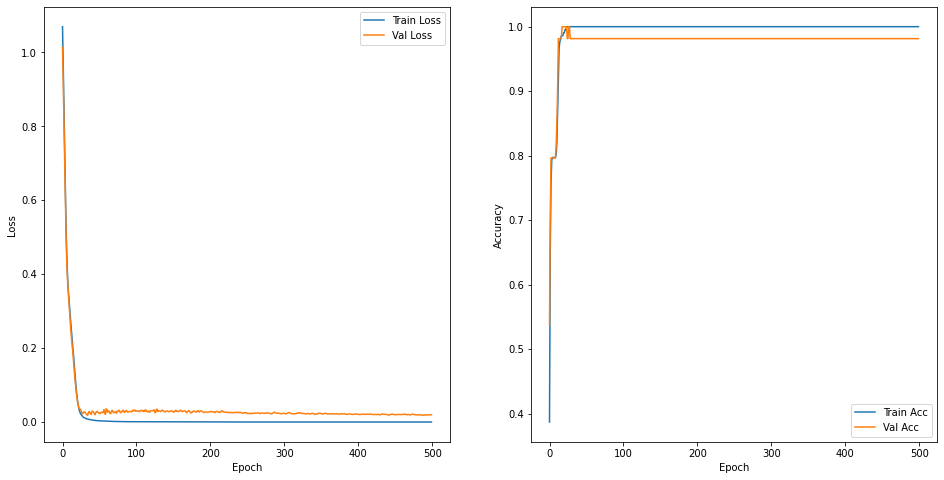

In [58]:
import matplotlib.pyplot as plt


# 학습곡선

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Acc')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Acc')

    plt.legend()
    plt.show()

plot_history(history)

In [59]:
model.evaluate(x_train, y_train_o)

9/9 [==============================] - 0s 2ms/step - loss: 0.0040 - acc: 0.9962


[0.004013227764517069, 0.9962406158447266]

In [60]:
x_test_s = scaler.transform(x_test)
y_test_o = to_categorical(y_test) # 원핫 인코딩

In [61]:
model.evaluate(x_test_s, y_test_o)

3/3 [==============================] - 0s 4ms/step - loss: 5.0741e-06 - acc: 1.0000


[5.074069576949114e-06, 1.0]

In [62]:
y_pred = model.predict(x_test_s)
y_pred

3/3 [==============================] - 0s 3ms/step


array([[1.00000000e+00, 7.40463731e-21, 3.93843676e-13],
       [1.35394185e-08, 9.99998093e-01, 1.88303136e-06],
       [9.32922095e-09, 7.66080603e-08, 9.99999881e-01],
       [1.00000000e+00, 8.39937386e-14, 9.49401408e-12],
       [9.44645961e-08, 9.99994755e-01, 5.08370704e-06],
       [1.29974009e-09, 4.65087666e-08, 1.00000000e+00],
       [2.13016392e-06, 9.99940276e-01, 5.76160237e-05],
       [1.37263340e-10, 2.72393708e-09, 1.00000000e+00],
       [1.00000000e+00, 5.04915696e-14, 7.52439083e-12],
       [1.84119369e-08, 8.33589340e-08, 9.99999881e-01],
       [5.77467389e-08, 9.99995351e-01, 4.65706444e-06],
       [9.99999881e-01, 8.49314219e-08, 1.87259062e-08],
       [3.18572302e-06, 1.80389549e-07, 9.99996662e-01],
       [5.43662115e-10, 9.79852572e-08, 9.99999881e-01],
       [1.00000000e+00, 1.36086075e-14, 3.28644369e-11],
       [1.05974998e-07, 1.59881253e-07, 9.99999762e-01],
       [4.35637897e-12, 6.80980072e-09, 1.00000000e+00],
       [9.99992728e-01, 7.22463

In [63]:
model.evaluate(x_test_s, y_pred)

3/3 [==============================] - 0s 3ms/step - loss: 5.4450e-05 - acc: 1.0000


[5.445030183182098e-05, 1.0]

In [64]:
y_pred = np.argmax(y_pred, axis=1)

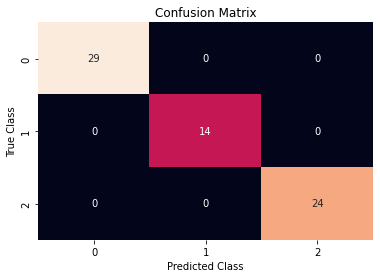

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    cfm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cfm, annot = True, cbar = False)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test, y_pred)